# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import pandas as pd
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta

# Viz mantra
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

sensor.isna().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

In [5]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


How many rows and columns are in our data?

In [6]:
# Your code here:

print(f"rows: {sensor.shape[0]}, columns: {sensor.shape[1]}")

rows: 1751, columns: 12


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:
# Your code here:

time = pd.date_range(start="1/1/2018 00:00:00", end="1/1/2018 00:29:10", periods=sensor.shape[0])
time = pd.DatetimeIndex(time, freq=pd.infer_freq(time))
time

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

Assign the time series index to the dataframe's index.

In [8]:
# Your code here:

sensor = sensor.set_index(time)
sensor.head(3)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

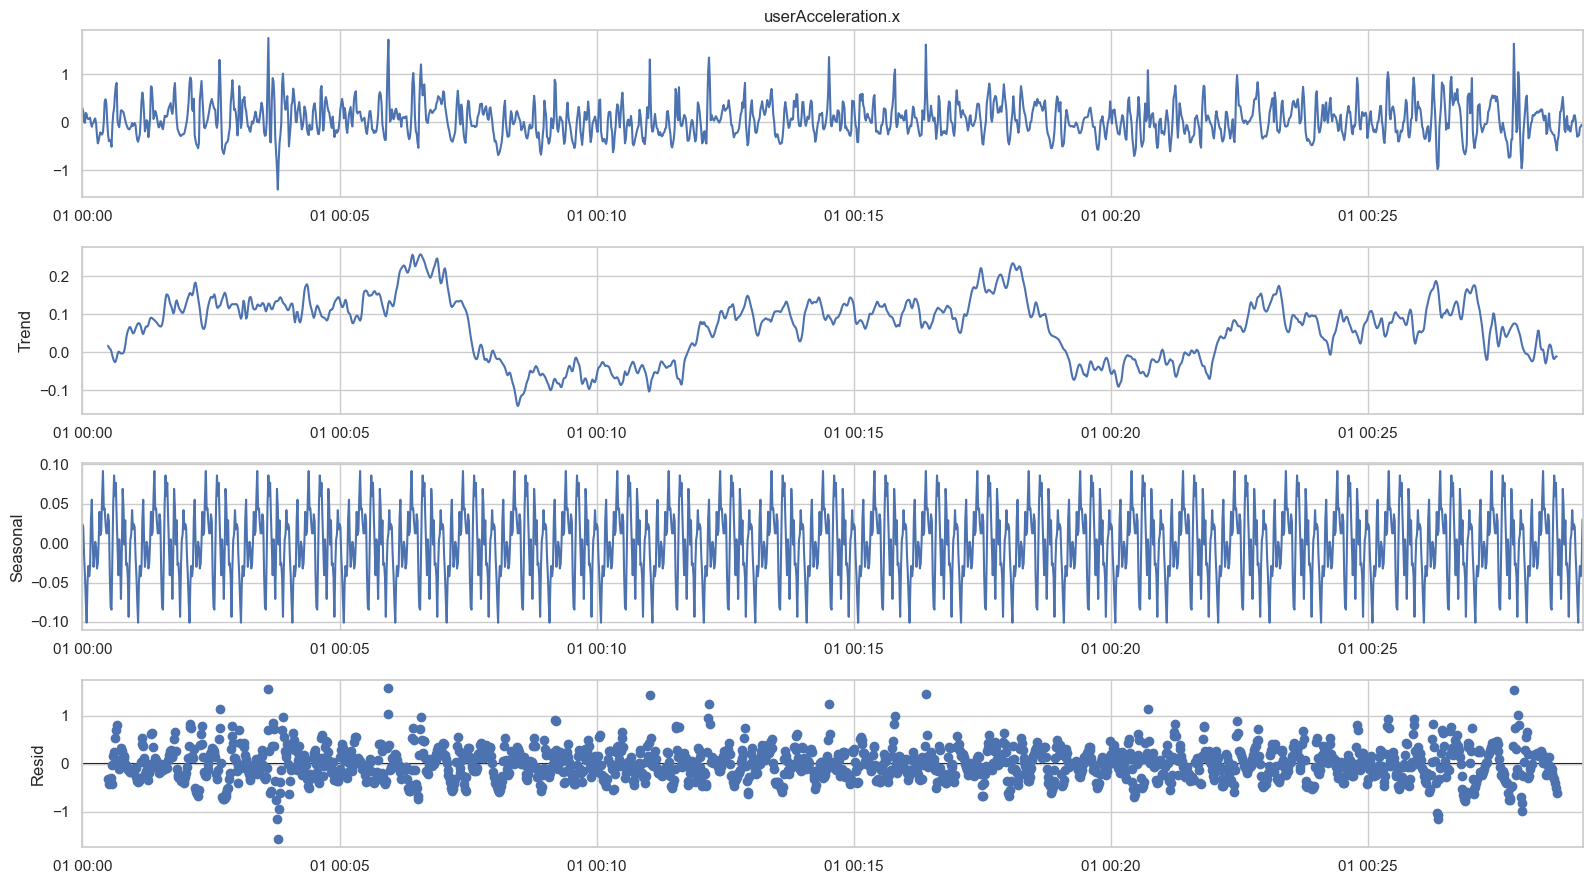

In [9]:
# Your code here:

decomp = seasonal_decompose(sensor['userAcceleration.x'], model = "additive", period=60)
decomp.plot();

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

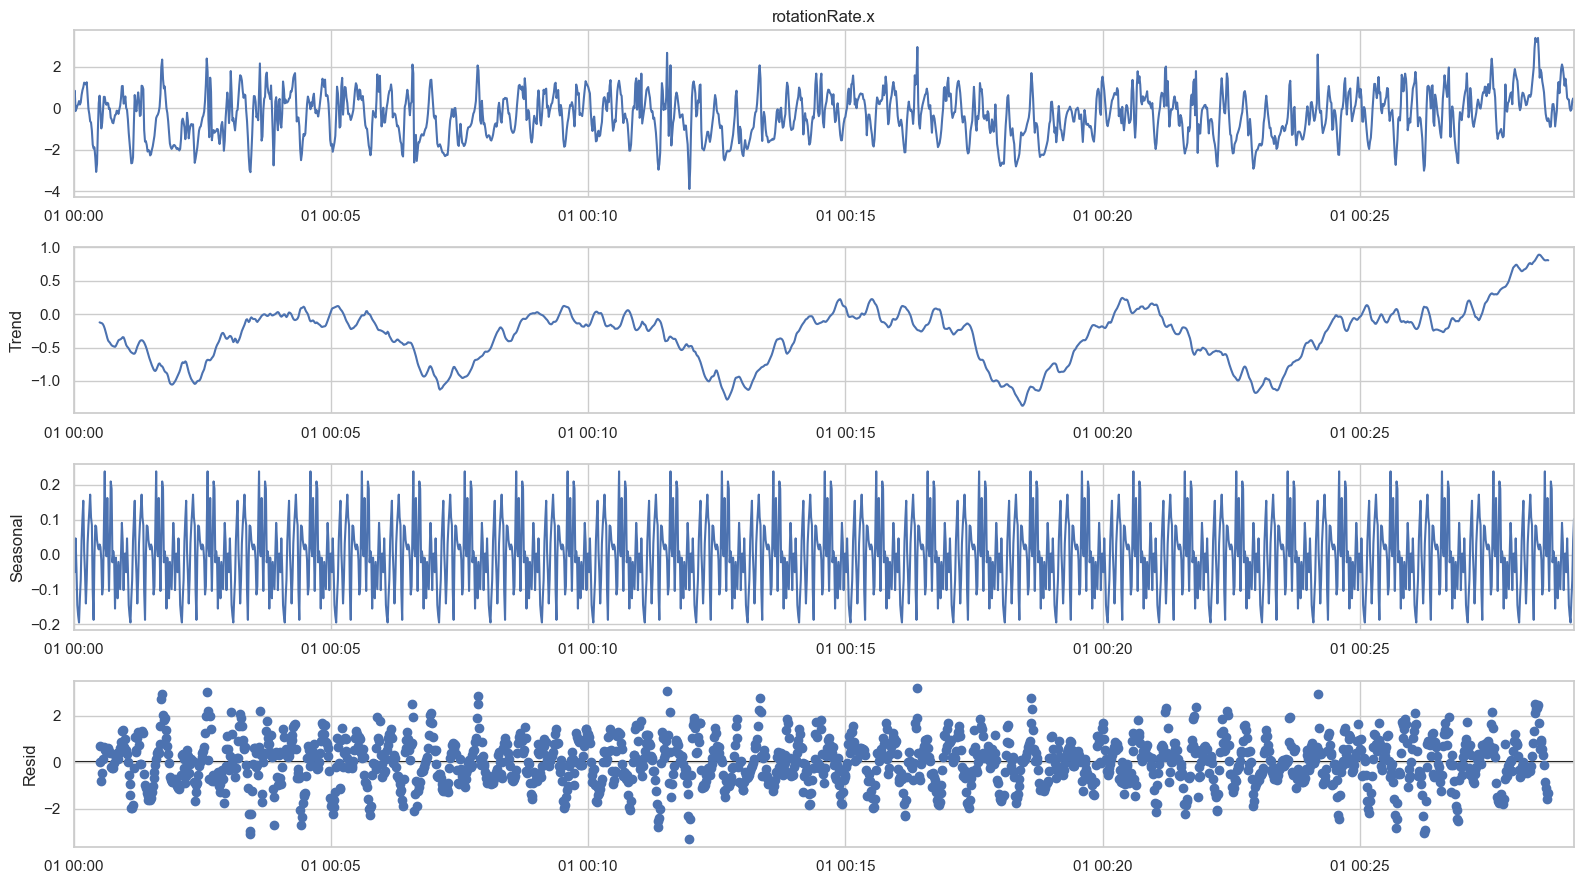

In [10]:
decomp_2 = seasonal_decompose(sensor['rotationRate.x'], model = "additive", period=60)
decomp_2.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


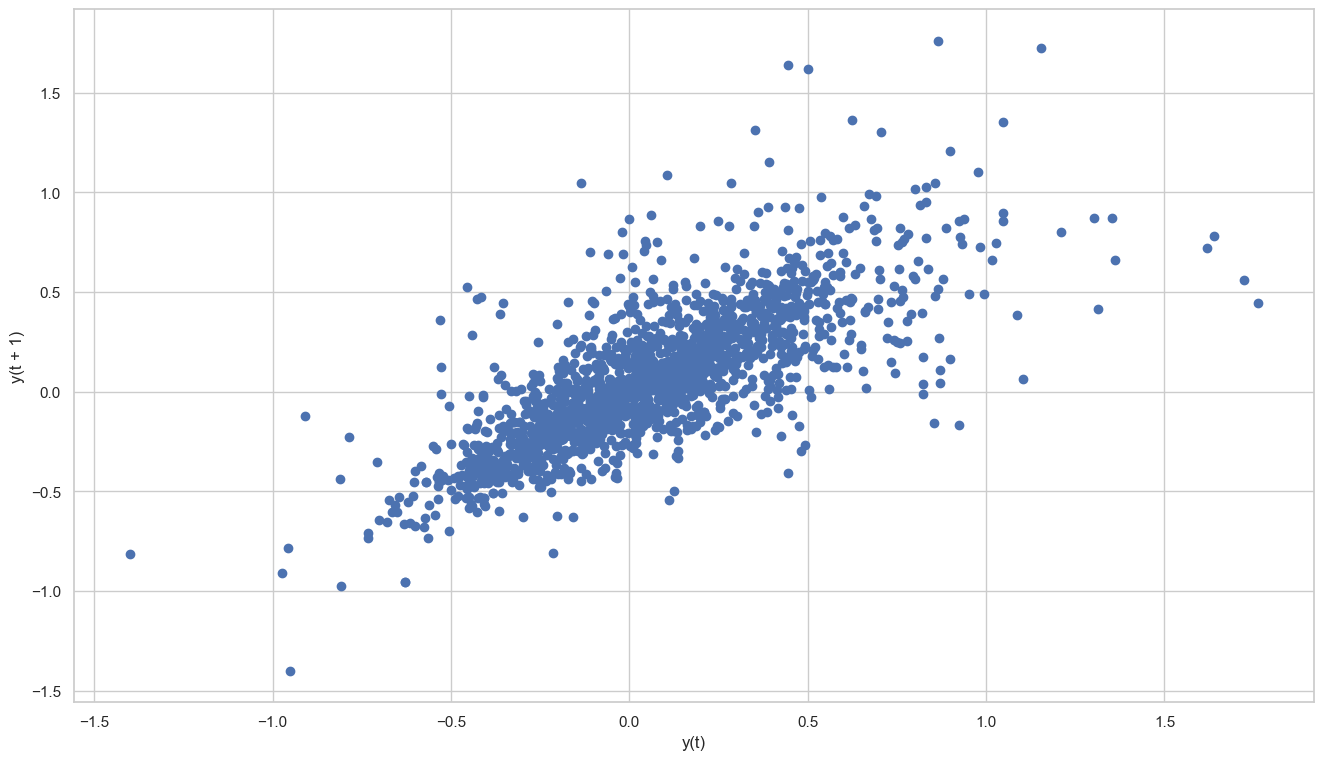

In [11]:
# Your code here:

pd.plotting.lag_plot(sensor['userAcceleration.x'], lag=1);

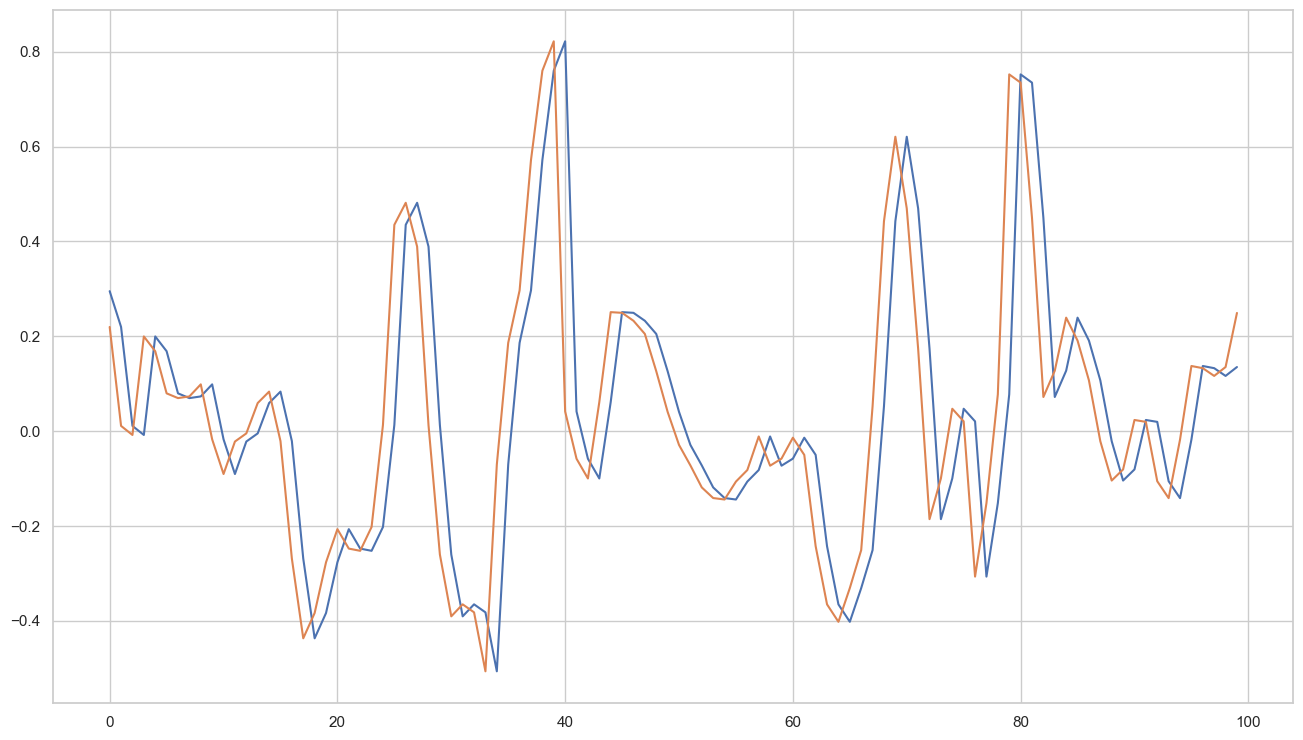

In [12]:
sensor_1 = sensor['userAcceleration.x']
sensor_1_plus = sensor['userAcceleration.x'][1:]
plt.plot(sensor_1.values[:100])
plt.plot(sensor_1_plus.values[:100]);

Create a lag plot for `rotationRate.x`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


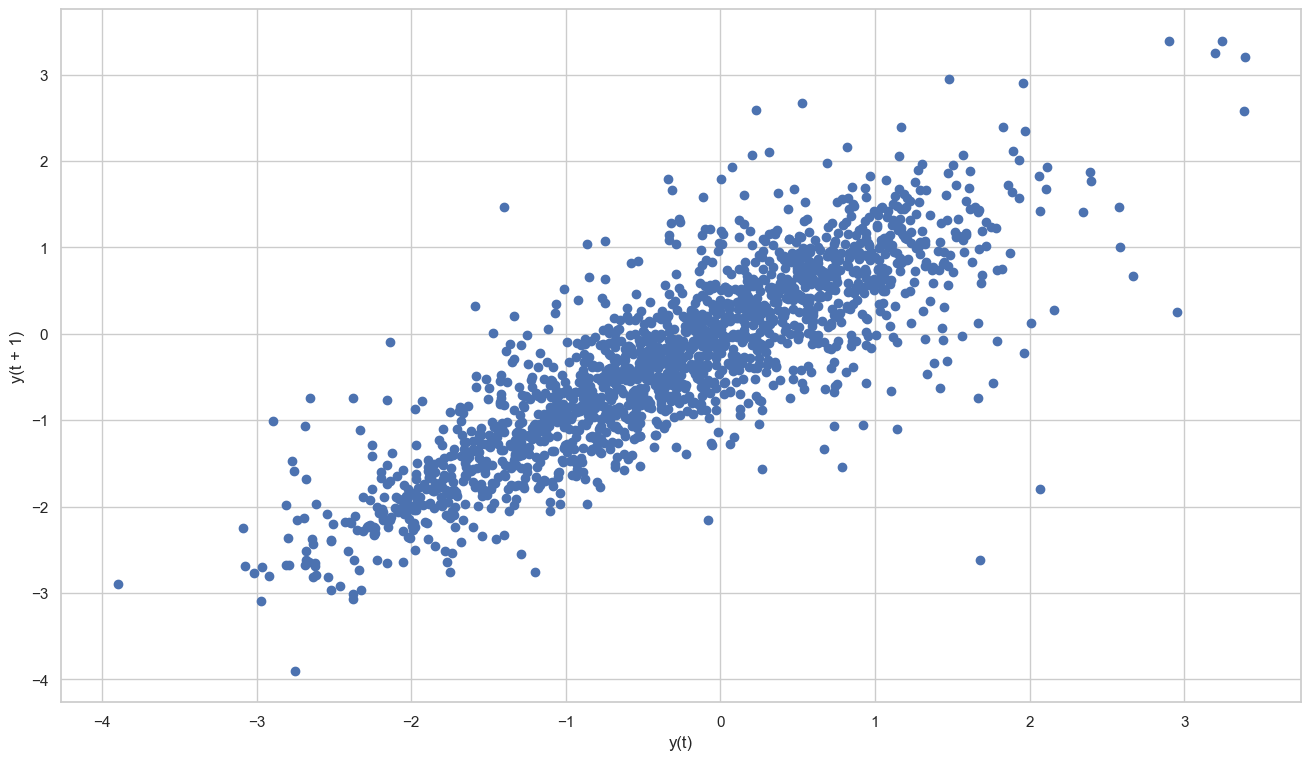

In [13]:
# Your code here:

pd.plotting.lag_plot(sensor['rotationRate.x'], lag=1);

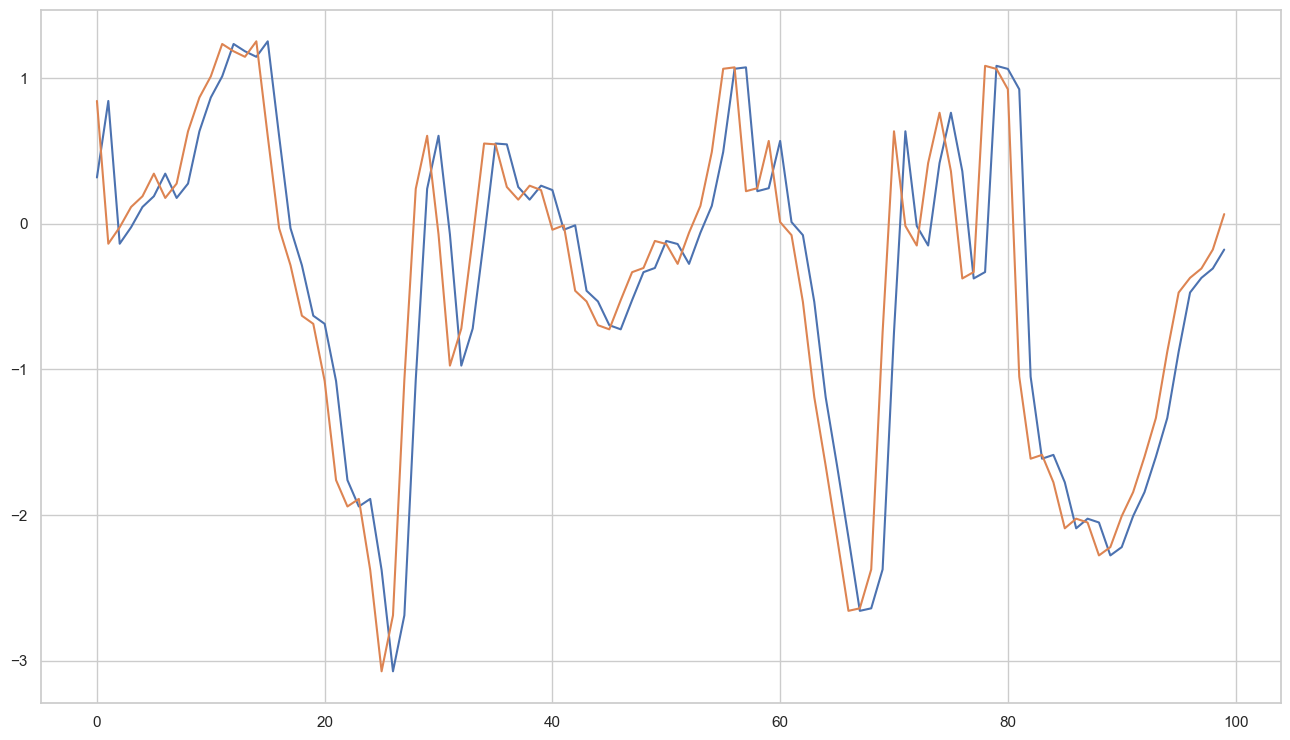

In [14]:
sensor_2 = sensor['rotationRate.x']
sensor_2_plus = sensor['rotationRate.x'][1:]
plt.plot(sensor_2.values[:100])
plt.plot(sensor_2_plus.values[:100]);

What are your conclusions from both visualizations?

In [15]:
# Your conclusions here:

# That there is an autocorrelation given that:
    # 1. In the lag plot, when the lag is close 1, the points are closer to the diagonal, indicating that
    # each point isn't at random.
    # 2. If we create a series lacking the initial values (we are creating a delayed series),
    # we can see how one is exactly a delayed version of the other, indicating autocorrelation.
    # 3. From both of them, the one that autocorrelates better is the rotationRate.x.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [16]:
# Your code here:

stationarity_userAcc = adfuller(sensor["userAcceleration.x"])
stationarity_userAcc[1] #p-value

2.823439483037483e-30

In [17]:
stationarity_rotaRate = adfuller(sensor["rotationRate.x"])
stationarity_rotaRate[1] #p-value

6.3202303359123905e-06

What are your conclusions from this test?

In [18]:
# Your conclusions here:

# 𝐻0  (Null Hypothesis) : The series is not stationary and there is a statistically significant trend
# 𝐻𝐴  (Alternative hypothesis) : The series is stationary 

# Given that in both cases p-value is < 0.05, we can reject H0.
# Therefore we have evidence to say that these variables are stationary.

## Bonus: Challenge 2

Finally, we'll create an ARIMA model for `userAcceleration.x`. Load the `ARIMA` function from `statsmodels`. The order of the model is (2, 0, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
order = (2, 0, 1)

In [21]:
# 0. Splitting into train & test
y_train = sensor["userAcceleration.x"][:-10]
y_test = sensor["userAcceleration.x"][-10:]

In [29]:
y_train.tail(1)

2018-01-01 00:29:00    0.140211
Freq: S, Name: userAcceleration.x, dtype: float64

In [31]:
y_test

2018-01-01 00:29:01    0.149749
2018-01-01 00:29:02    0.038461
2018-01-01 00:29:03   -0.169175
2018-01-01 00:29:04   -0.300361
2018-01-01 00:29:05   -0.270174
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Freq: S, Name: userAcceleration.x, dtype: float64

In [22]:
# 1. Create an instance of the ARIMA model that takes y_train, the order, and freq="S"
# Docs: https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.html

model = ARIMA(y_train, order = order, freq="S")
model

In [23]:
# 2. Fit the model:

model = model.fit()

In [33]:
# 3. Predict: create y_pred:

y_pred = model.predict(start=len(y_train), end=len(y_train)+9)
y_pred

2018-01-01 00:29:01    0.173146
2018-01-01 00:29:02    0.142889
2018-01-01 00:29:03    0.100513
2018-01-01 00:29:04    0.070097
2018-01-01 00:29:05    0.056091
2018-01-01 00:29:06    0.053770
2018-01-01 00:29:07    0.056783
2018-01-01 00:29:08    0.060638
2018-01-01 00:29:09    0.063308
2018-01-01 00:29:10    0.064485
Freq: S, Name: predicted_mean, dtype: float64

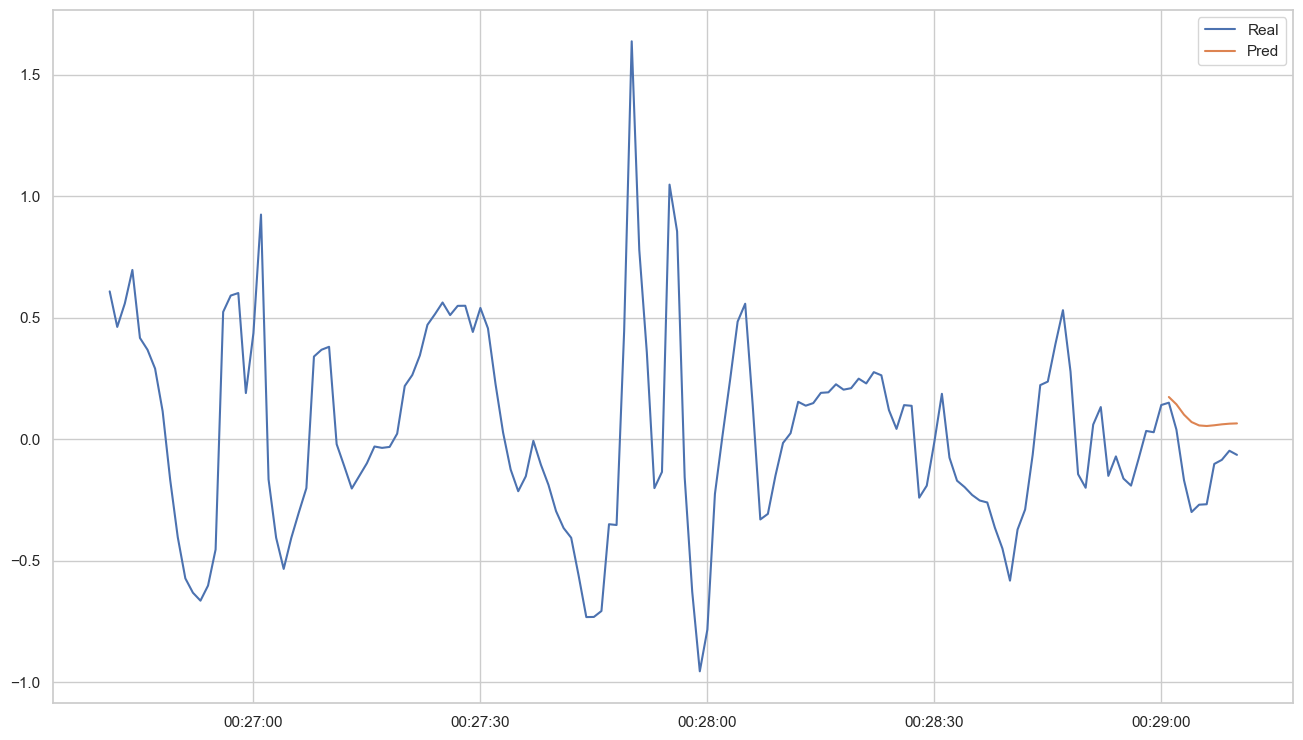

In [36]:
# 4. Visualize
plt.plot(sensor["userAcceleration.x"][-150:], label = "Real")
plt.plot(y_pred[-150:], label = "Pred")
plt.legend();

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [33]:
# Your code here:

rmse(y_pred, y_test)

0.20762086535744115

**Other tests**

In [41]:
# Trying predict all points
y_pred_2 = model.predict(start=0, end=len(sensor["userAcceleration.x"])-1)
y_pred_2

2018-01-01 00:00:00    0.063734
2018-01-01 00:00:01    0.239251
2018-01-01 00:00:02    0.127263
2018-01-01 00:00:03   -0.068712
2018-01-01 00:00:04    0.023540
                         ...   
2018-01-01 00:29:06    0.053770
2018-01-01 00:29:07    0.056783
2018-01-01 00:29:08    0.060638
2018-01-01 00:29:09    0.063308
2018-01-01 00:29:10    0.064485
Freq: S, Name: predicted_mean, Length: 1751, dtype: float64

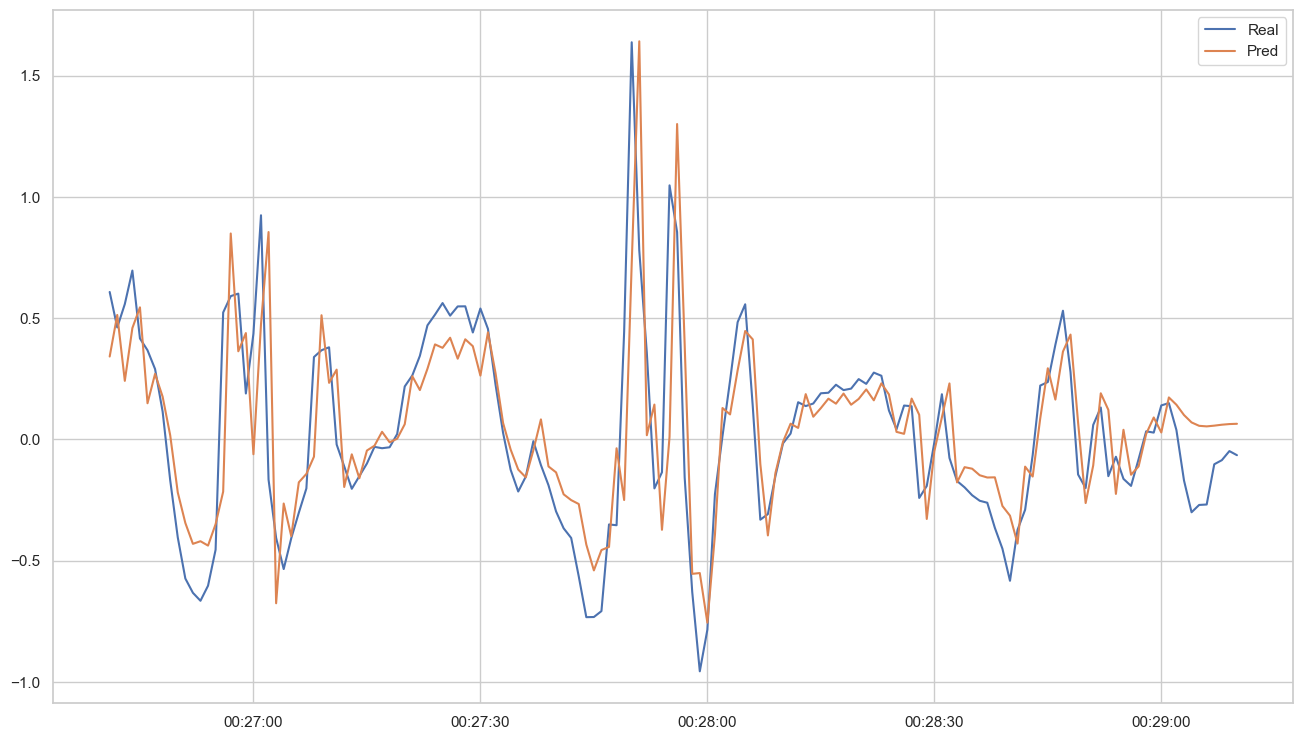

In [42]:
# Visualizing
plt.plot(sensor["userAcceleration.x"][-150:], label = "Real")
plt.plot(y_pred_2[-150:], label = "Pred")
plt.legend();

In [43]:
#How good is the prediction of the whole variable:
rmse(y_pred_2, sensor['userAcceleration.x'])

0.19542080282587979

**Repeat the process with a variable that autocorrelates better**

In [44]:
sensor.corr()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
attitude.roll,1.000000,-0.174992,0.017448,0.244522,0.176398,0.989750,0.300941,0.137303,-0.058952,0.255000,-0.104904,-0.365342
attitude.pitch,-0.174992,1.000000,0.408419,0.870057,-0.997818,-0.259796,0.024358,-0.081630,0.079436,-0.316406,0.245931,0.111762
attitude.yaw,0.017448,0.408419,1.000000,0.393436,-0.414980,-0.019386,-0.132540,-0.054435,-0.019424,-0.103988,0.189223,0.038412
gravity.x,0.244522,0.870057,0.393436,1.000000,-0.861289,0.166455,0.173899,-0.002022,0.064475,-0.166032,0.210132,-0.062217
gravity.y,0.176398,-0.997818,-0.414980,-0.861289,1.000000,0.262819,-0.023037,0.085809,-0.079014,0.317511,-0.250575,-0.110683
gravity.z,0.989750,-0.259796,-0.019386,0.166455,0.262819,1.000000,0.304289,0.150985,-0.062916,0.277098,-0.124270,-0.373650
rotationRate.x,0.300941,0.024358,-0.132540,0.173899,-0.023037,0.304289,1.000000,-0.194066,0.357653,0.176945,0.068974,-0.003272
rotationRate.y,0.137303,-0.081630,-0.054435,-0.002022,0.085809,0.150985,-0.194066,1.000000,-0.586079,-0.053177,-0.073973,-0.186613
rotationRate.z,-0.058952,0.079436,-0.019424,0.064475,-0.079014,-0.062916,0.357653,-0.586079,1.000000,0.123178,0.029901,0.182828
userAcceleration.x,0.255000,-0.316406,-0.103988,-0.166032,0.317511,0.277098,0.176945,-0.053177,0.123178,1.000000,0.061279,-0.280189


In [45]:
sensor.columns

Index(['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x',
       'gravity.y', 'gravity.z', 'rotationRate.x', 'rotationRate.y',
       'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y',
       'userAcceleration.z'],
      dtype='object')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


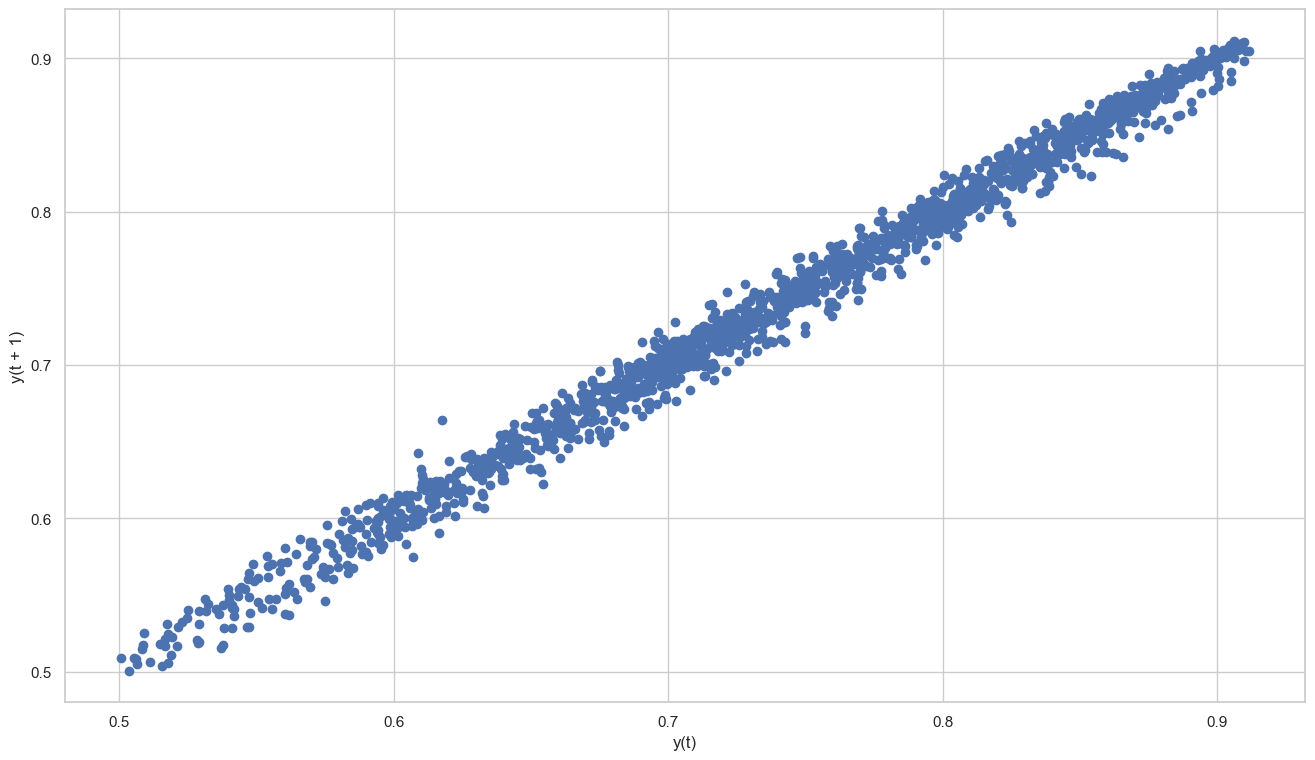

In [81]:
pd.plotting.lag_plot(sensor['gravity.x'], lag=1);

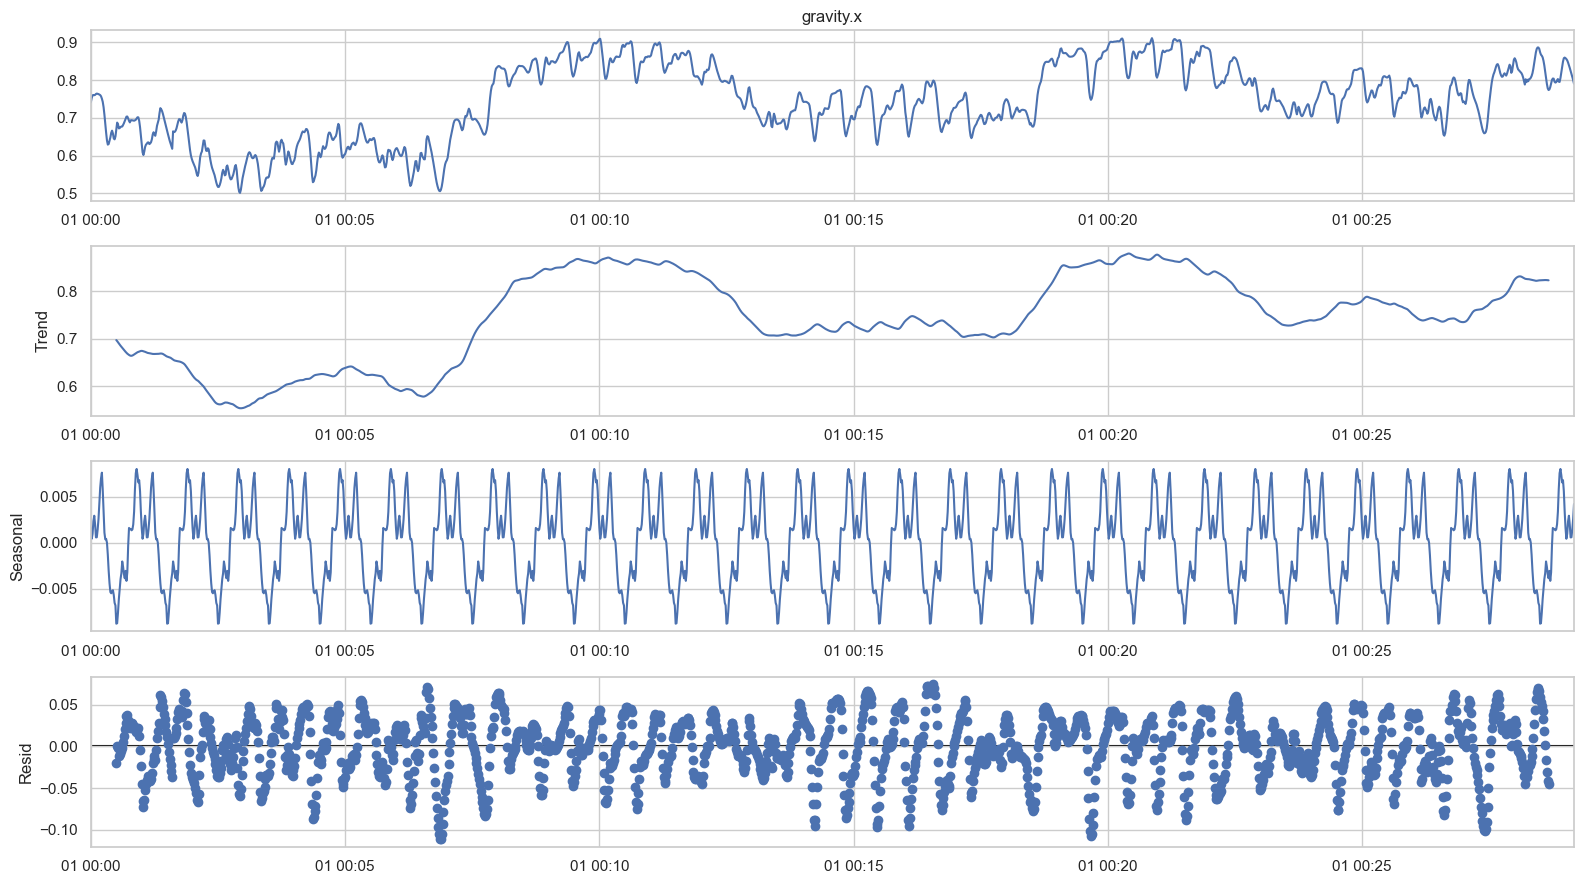

In [69]:
seasonal_decompose(sensor['gravity.x'], model = "additive", period=60).plot();

In [70]:
# 0. Splitting into train & test
y_train_2 = sensor["gravity.x"][:-10]
y_test_2 = sensor["gravity.x"][-10:]

In [115]:
# 1. Fitting model
model_2 = ARIMA(y_train_2, order = (2, 0, 1), freq="S").fit()

In [116]:
y_pred_2 = model_2.predict(start=0, end=len(sensor["gravity.x"])-1)
y_pred_2

2018-01-01 00:00:00    0.744803
2018-01-01 00:00:01    0.741909
2018-01-01 00:00:02    0.761729
2018-01-01 00:00:03    0.762219
2018-01-01 00:00:04    0.760325
                         ...   
2018-01-01 00:29:06    0.845921
2018-01-01 00:29:07    0.843554
2018-01-01 00:29:08    0.841218
2018-01-01 00:29:09    0.838924
2018-01-01 00:29:10    0.836676
Freq: S, Name: predicted_mean, Length: 1751, dtype: float64

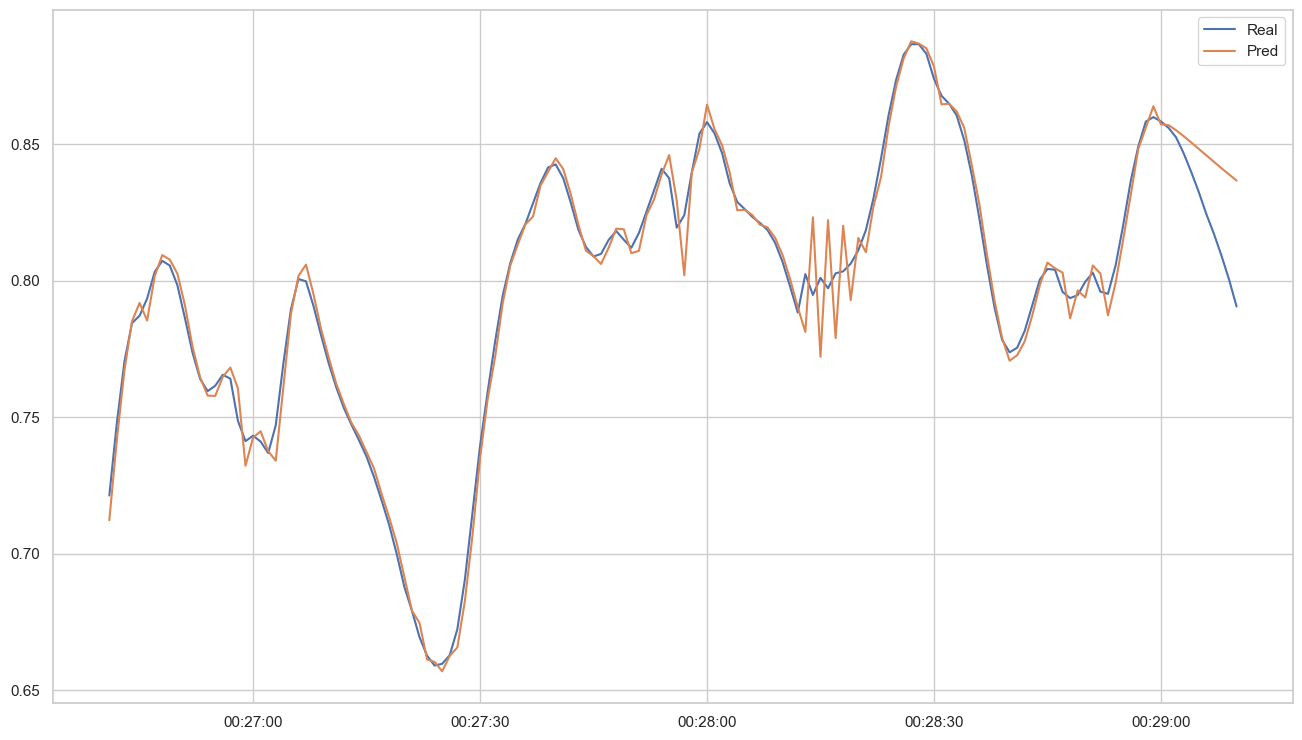

In [117]:
plt.plot(sensor["gravity.x"][-150:], label = "Real")
plt.plot(y_pred_2[-150:], label = "Pred")
plt.legend();

In [118]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              gravity.x   No. Observations:                 1741
Model:                 ARIMA(2, 0, 1)   Log Likelihood                6691.240
Date:                Wed, 09 Nov 2022   AIC                         -13372.480
Time:                        22:15:40   BIC                         -13345.169
Sample:                    01-01-2018   HQIC                        -13362.381
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7448      0.022     33.538      0.000       0.701       0.788
ar.L1          1.5729      0.015    102.903      0.000       1.543       1.603
ar.L2         -0.5826      0.015    -39.548      0.000      -0.611      -0.554
ma.L1          0.6230      0.007     87.879      0.000       0.609       0.637
sigma2      2.673e-05   4.55e-07     58.803      0.000    2.58e-05    2.76e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             31639.91
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Looking at the summary, pdq of 2,0,1 was the best

**Finding the optimal parameters p, d, q**

We have seen before that data is not stationary.

**Optimal d:**  
- For this we look at the number of differencing required to make the data stationary.
- One is enough, thus d = 1. After trying, 0 was better. Maybe 1 was adding too much noise

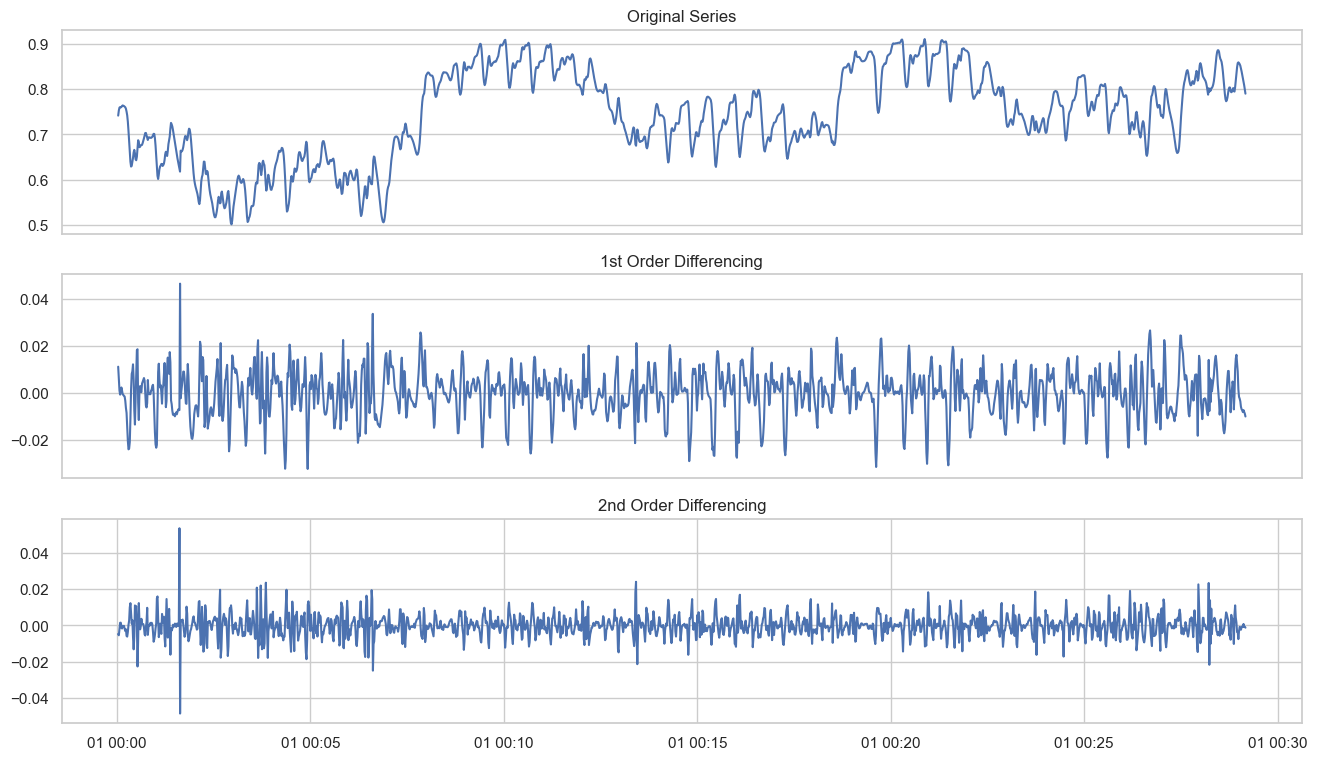

In [74]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(sensor["gravity.x"]); 
ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(sensor["gravity.x"].diff()); 
ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(sensor["gravity.x"].diff().diff()); 
ax3.set_title('2nd Order Differencing')
plt.show()

**Optimal p:**
- We can find this value by inspecting the PACF plot.
- Using the PACF plot we can take the order of AR terms to be equal to the lags that can cross a significance limit. 
- Here we can see that the first 2 lags are significantly out of the limit so we can select the order of the p as 2. (the first is lag 0, autocorrelation with itself = 1.

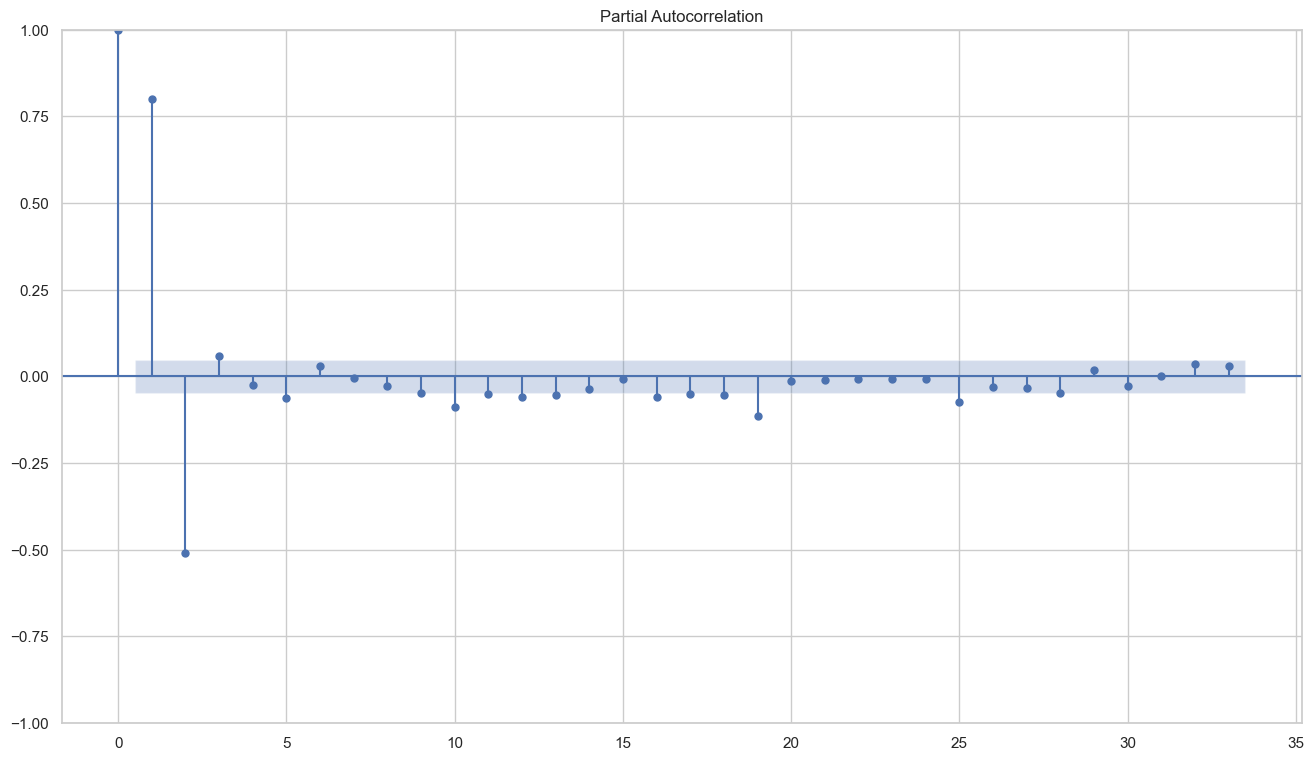

In [78]:
plot_pacf(sensor["gravity.x"].diff().dropna());

**Optimal q:**
- To find out the value of q we can use the ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series.
- 2 lags are significantly out of the significance limit, q = 2.

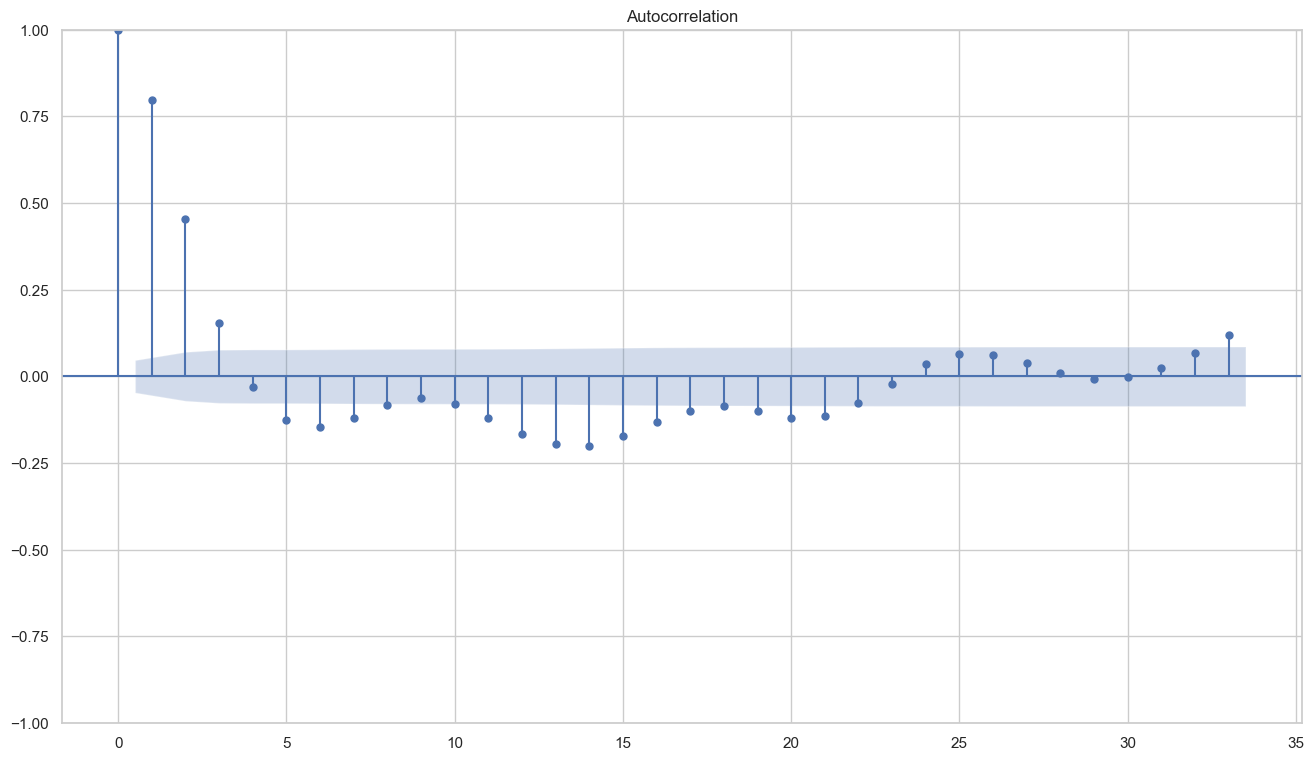

In [114]:
plot_acf(sensor["gravity.x"].diff().dropna());